In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime


In [2]:
def load_data(folder_path: str, file_name:str) -> pd.DataFrame:
    """Load parquet files and return theirs as a pandas dataframe.

    Args:
        folder_path (str): The address of our main directory, where our files are in it.
        file_name (str): The files name pattern.

    Returns:
        pd.DataFrame: Dataframe of our parquet files.
    """
    path = Path(folder_path)
    files = [str(file) for file in list(path.glob(file_name))]
    df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
    return df


# <font color='#D2B4DE'> Questions:</font>

---
### <font color='#D2B4DE'> Q1. How many tennis players are included in the dataset?</font>

- **Load needed data**

In [3]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [4]:
pd.concat([match_home_team_df, match_away_team_df]).name.nunique()

596

- **Our analysis**

596 tennis players are participated in these matches!

---
### <font color='#D2B4DE'> Q2. How many years have passed since each player became a professional?</font>

- **Load needed data**

In [5]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [6]:
home_players = match_home_team_df[['player_id','name', 'turned_pro']]
away_players = match_away_team_df[['player_id','name', 'turned_pro']]

home_away = pd.concat([home_players, away_players], ignore_index=True)

home_away_unique = home_away.drop_duplicates()
home_away_unique['turned_pro'] = home_away_unique['turned_pro'].astype(dtype='float64')

current_year = pd.Timestamp.now().year

duration = current_year - home_away_unique['turned_pro']
home_away_unique.assign(duration_of_being_pro=duration)

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\1077926465.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_away_unique['turned_pro'] = home_away_unique['turned_pro'].astype(dtype='float64')


,player_id,name,turned_pro,duration_of_being_pro
0,132834,Barrios Vera T.,2014.0,10.0
1,221515,Tirante T.,NaN,NaN
2,302582,Heide G.,NaN,NaN
3,207081,Ajduković D.,NaN,NaN
4,80491,Escobedo E.,2014.0,10.0
...,...,...,...,...
791,255993,Trotter J.,NaN,NaN
792,74875,Wagner S.,NaN,NaN
795,152106,Zaar L.,NaN,NaN
797,276713,Lopatetska D.,NaN,NaN


In [7]:
home_away_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 0 to 818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player_id   596 non-null    int64  
 1   name        596 non-null    object 
 2   turned_pro  106 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 18.6+ KB


In [8]:
min(duration)

5.0

In [9]:
print(home_away_unique[home_away_unique['turned_pro']==2019])

     player_id                  name  turned_pro
238     107351           Cozbinov A.      2019.0
456     261015            Musetti L.      2019.0
461     157456  Davidovich Fokina A.      2019.0


In [10]:
max(duration)

24.0

In [11]:
print(home_away_unique[home_away_unique['turned_pro']==2000])

     player_id          name  turned_pro
478      18298  Zvonareva V.      2000.0


- **Our analysis**

<font color='red'> First approach: </font>Out of our 596 tennis players, only 106 players, that is about 17%, are known as professional athletes, where *Zvonareva*, with 24 years of experience, is the oldest active pro player, and *Cozbinov, Musetti and Davidovich*, with 5 years of experience, are the newest players who were added to the list of professionals.

<font color='red'> Second approach: </font>In the first approach, we thought that only 106 players have reached the professional stage, but in this approach, we think that the input data is incomplete and null, and because the volume of this data is large, that is why it cannot be analyzed.

---
### <font color='#D2B4DE'> Q3. Which player has the highest number of wins?</font>

- **Load needed data**

In [12]:
folder_path = 'data/raw_match_parquet/'

event_df = load_data(folder_path, 'event_*.parquet')
match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [13]:
df_6 = event_df[['match_id','winner_code']].loc[event_df['winner_code'] == 1]
df_7 = event_df[['match_id','winner_code']].loc[event_df['winner_code'] == 2]
home = pd.merge(df_6, match_home_team_df).drop_duplicates('match_id')
away = pd.merge(df_7, match_away_team_df).drop_duplicates('match_id')
df_8 = pd.concat([home,away])
df_8['name'].value_counts().reset_index(name = 'wins').head(5)

,name,wins
0,Milushev P.,3
1,Kalina V.,3
2,Panaras A.,3
3,Tirante T.,2
4,Mouilleron Salvo M.,2


- **Our analysis**

Miloshev, Kalina and Panaras have the most wins together with 3 wins each!

---
### <font color='#D2B4DE'> Q4. What is the longest match recorded in terms of duration?</font>

- **Load needed data**

In [14]:
folder_path = 'data/raw_match_parquet/'

matches_time = load_data(folder_path, 'time_*.parquet').reset_index()

In [15]:
matches_periods = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']
for period in matches_periods :
    if not 'None' :
        matches_time[period] = matches_time[period].astype(int)

In [16]:
matches_time.fillna(0, inplace=True)

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\3196397762.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matches_time.fillna(0, inplace=True)


In [17]:
matches_periods = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']
for period in matches_periods:
    matches_time[period] = matches_time[period]/60
matches_time['match_duration'] = matches_time['period_1'] + matches_time['period_2'] + matches_time['period_3'] + matches_time['period_4'] + matches_time['period_5']
matches_time['match_duration'].max()

213.91666666666669

- **Our analysis**

The longest match duration in this tennis tournament is approximately 213 minutes or 3 hours and 33 minutes. About 2.5 times a football match!

---
### <font color='#D2B4DE'> Q5. How many sets are typically played in a tennis match?</font>

- **Load needed data**

In [18]:
folder_path = 'data/raw_match_parquet/'

match_away_team_score_df = load_data(folder_path, 'away_team_score*.parquet')
match_home_team_score_df = load_data(folder_path, 'home_team_score*.parquet')

In [19]:
away_home_score = pd.concat([match_away_team_score_df,match_home_team_score_df]).drop_duplicates('match_id')
away_home_score.dropna(subset=['period_1', 'period_2', 'period_3', 'period_4', 'period_5'], how='all')

away_home_score['total_sets'] = away_home_score[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].count(axis=1)

typical_sets = away_home_score['total_sets'].mean()

print(f"The typical number of sets played in a tennis match is: {typical_sets}")


The typical number of sets played in a tennis match is: 2.181937172774869


- **Our analysis**

Tennis matches usually last about 2 sets!

---
### <font color='#D2B4DE'> Q6. Which country has produced the most successful tennis players?</font>

- **Load needed data**

In [20]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [21]:
players = pd.concat([match_home_team_df, match_away_team_df], ignore_index=True)

total_prize_by_country = players[['country', 'total_prize']]
total_prize_by_country_unique = total_prize_by_country.drop_duplicates()

total_prize_by_country_unique_sum = total_prize_by_country_unique.groupby('country')['total_prize'].agg('sum')
total_prize_by_country_unique_sum.sort_values(ascending=False)

country
Russia            71507160
Czech Republic    70563912
France            50421056
Belarus           49685953
USA               44516869
                    ...   
Luxembourg            9577
Uzbekistan            8408
Nigeria               7451
Uruguay               7227
Ireland               4218
Name: total_prize, Length: 70, dtype: object

- **Our analysis**

Most successful tennis players are from european countries and at the top of them are Russia, Czech Republic, France and Belarus. After that is United State of America from north america. 
The total amount of prizes received by the players of each country, in my opinion, would give a better view to understand which country has produced the most successful tennis players in world. Because we know that being in any rank in any tournament (usually top 4) includes prizes.

---
### <font color='#D2B4DE'> Q7. What is the average number of aces per match? </font>

**Description:** In tennis, an ace is a legal serve that is not touched by the receiver, winning the point for the server.

- **Load needed data**

In [22]:
folder_path = 'data/raw_statistics_parquet/'

period_df = load_data(folder_path, 'statistics_*.parquet')

In [23]:
count_of_aces_per_match = period_df[(period_df['statistic_name'] == 'aces') & (period_df['period'] == 'ALL')]
(count_of_aces_per_match['home_value'] + count_of_aces_per_match['away_value']).sum() / count_of_aces_per_match['match_id'].nunique()

4.009569377990431

- **Our analysis**

Usually 4 aces occur in each match!

---
### <font color='#D2B4DE'>Q8. Is there a difference in the number of double faults based on gender? </font>

**Description:** Double faults is losting the two first serves.

- **Load needed data**

In [24]:
folder_path = 'data/raw_match_parquet/'

match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')
event_df = load_data(folder_path, 'event_*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [25]:
serves_basedon_gender = pd.merge(match_home_team_df, event_df, on = 'match_id')

serves_basedon_gender = serves_basedon_gender[serves_basedon_gender['first_to_serve'].isin([0, 2])]
double_faults = serves_basedon_gender.groupby('gender', as_index=False)['first_to_serve'].count()
print(double_faults)

  gender  first_to_serve
0      F              47
1      M              43


In [26]:
delta = abs(double_faults['first_to_serve'][1] - double_faults['first_to_serve'][0])
delta

4

- **Our analysis**

The difference of dauble faults between men and women is 4 which is not a big number.

---
### <font color='#D2B4DE'> Q9. Which player has won the most tournaments in a single month?</font>

- **Load needed data**

In [27]:
folder_path = 'data/raw_match_parquet/'

round_df = load_data(folder_path, 'round_*.parquet')
event_df = load_data(folder_path, 'event_*.parquet')

In [29]:
event_round = pd.merge(event_df, round_df, on='match_id')

event_df['start_datetime'] = pd.to_datetime(event_df['start_datetime'], unit='s')
event_df['month'] = event_df['start_datetime'].dt.month
df_2 = pd.DataFrame(event_round['match_slug'],event_round['winner_code'])
event_round['winner'] = np.nan
event_round.loc[event_round['winner_code'] == 1, 'winner'] = event_round.loc[event_round['winner_code'] == 1, 'match_slug'].str.split('-').str[0]
event_round.loc[event_round['winner_code'] == 2, 'winner'] = event_round.loc[event_round['winner_code'] == 2, 'match_slug'].str.split('-').str[1]
event_round.drop(columns=['winner_code'], inplace=False)
df_3 =event_round.loc[event_round['slug'] == 'final' ]
df_3.groupby(['winner', 'month']).size()

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\2212516296.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['heide' 'heide' 'shelbayh' 'draper' 'van' 'kudermetova' 'bublik'
 'mededovic' 'rodionov' 'jarry' 'alcaraz' 'alcaraz' 'davidovich'
 'kalinina' 'brady' 'sabalenka' 'paolini' 'wang' 'fruhvirtova' 'wang'
 'zhu' 'siniakova' 'sonobe' 'biolay' 'sierra' 'grant' 'kessler' 'stearns'
 'kubka' 'privara' 'berberovic' 'pawelski' 'aunion' 'manzanera' 'singh'
 'maksymchuk' 'merida' 'pokorny' 'gulin' 'janicijevic' 'falcao' 'krutykh'
 'thomson' 'weis' 'sonobe' 'hoang' 'debru' 'gobat' 'sabas' 'liutarevich'
 'fery' 'zarazua' 'claverie' 'saraiva' 'kuzuhara' 'roveri' 'bicknell'
 'ono' 'tosetto' 'burnett' 'holmgren' 'moller' 'perez' 'rivera' 'zhu'
 'chidekh' 'lalami' 'hsu' 'zakharov' 'kachmazov' 'uchiyama' 'sun'
 'zhukayev' 'haliak' 'kirkin' 'lock' 'atmane' 'sekulic' 'tung' 'hijikata'
 'pampanin' 'svajda']' h

winner       month
berberovic   10       1
crawford     10       1
draper       10       1
gill         10       1
gjorcheska   10       1
glinka       10       1
grant        10       1
guillen      10       1
heide        10       1
hobgarski    10       1
janicijevic  10       1
kubka        10       1
kudermetova  10       1
ma           10       1
martynov     10       1
privara      10       1
roca         10       1
safwat       10       1
sonobe       10       1
tabur        10       1
vacherot     10       1
zarazua      10       1
dtype: int64

- **Our analysis**

There are 22 tournament winners, it shows that none of the players defended of his trophy!

---
### <font color='#D2B4DE'> Q10. Is there a correlation between a player's height and their ranking?</font>

- **Load needed data**

In [30]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [31]:
height_rank_df = pd.concat([match_home_team_df, match_away_team_df], ignore_index=True)

height_rank = height_rank_df[['player_id', 'height', 'current_rank']]
height_rank_unique = height_rank.drop_duplicates()

corr = height_rank_unique['height'].corr(height_rank_unique['current_rank'], method='pearson')
print(f"Correlation rate is: {corr}")

Correlation rate is: 0.032551692442547304


In [32]:
height_rank_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 0 to 818
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     596 non-null    int64  
 1   height        339 non-null    float64
 2   current_rank  578 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 18.6+ KB


- **Chart**

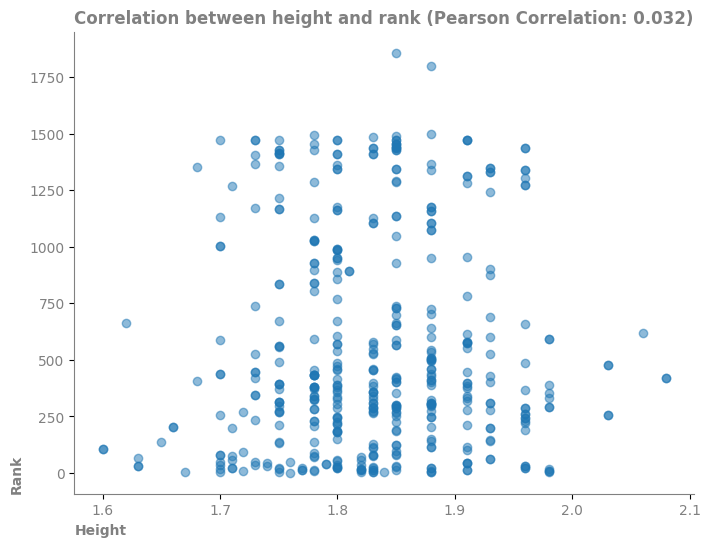

In [33]:
plt.figure(figsize=(8, 6))

plt.plot(height_rank['height'], height_rank['current_rank'],'o', alpha=0.5)

plt.title('Correlation between height and rank (Pearson Correlation: 0.032)', color='gray', loc='left', fontdict={'weight':'bold'})

plt.xlabel('Height', color='gray', loc='left', fontdict={'weight':'bold'})
plt.ylabel('Rank', color='gray', loc='bottom', fontdict={'weight':'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()


- **Our analysis**

Correlation rate is near to 0 (0.032) and it indicates no correlation between player's height and ranking.

---
### <font color='#D2B4DE'> Q11. What is the average duration of matches? </font>

In [34]:
matches_time['match_duration'].mean()

42.05157068062827

- **Our analysis**

The average duration of matches is about 42 minutes which makes sense since tennnis matches duration are between 30 minutes to an hour!

---
### <font color='#D2B4DE'> Q12.What is the average number of games per set in men's matches compared to women's matches?</font>

- **Load needed data**

In [35]:
folder_path = 'data/raw_tennis_power_parquet/'

power_df = load_data(folder_path, 'power_*.parquet')

In [36]:
games_per_set = power_df.merge(match_home_team_df, on = 'match_id', how = 'left')

In [37]:
female_games_per_set = games_per_set[games_per_set['gender'] == 'F']
male_games_per_set = games_per_set[games_per_set['gender'] == 'M']
F_count = female_games_per_set.groupby('match_id', as_index = False)['set_num'].value_counts()
F_count

Fmean_games_per_set = F_count['count'].mean()
Fmean_games_per_set

8.861702127659575

In [38]:
M_count = male_games_per_set.groupby('match_id', as_index=False)['set_num'].value_counts()
Mmean_games_per_set = M_count['count'].mean()
Mmean_games_per_set

9.138461538461538

- **Our analysis**

Avarage of games per set in female competitions is 8 games and in male competitions is 9. 
Avarage of games per set in male competitions is more than females by one.

---
### <font color='#D2B4DE'> Q13. What is the distribution of left-handed versus right-handed players?</font>

- **Load needed data**

In [39]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [40]:
right_left = pd.concat([match_home_team_df, match_away_team_df]).drop_duplicates('player_id')

right_handed = (right_left['plays']).str.contains('right').sum()
left_handed = (right_left['plays']).str.contains('left').sum()
print(f'The number of right-handed players is:  {right_handed}')
print(f'The number of left-handed players is:  {left_handed} ')

The number of right-handed players is:  244
The number of left-handed players is:  32 


- **Chart**

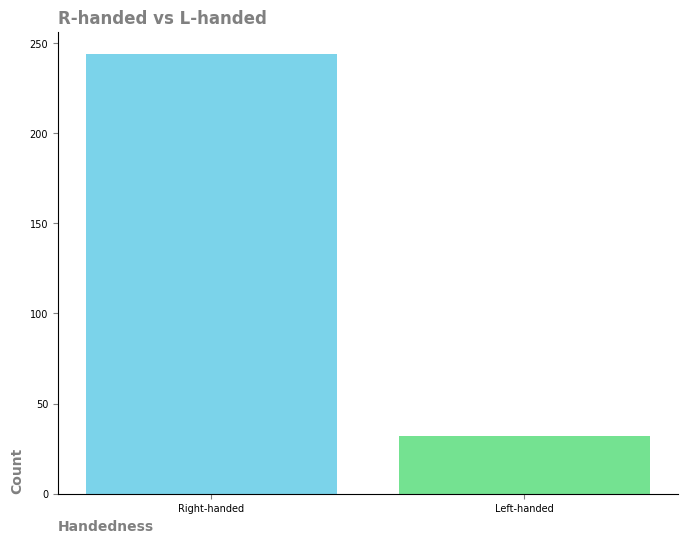

In [41]:
plt.figure(figsize=(8, 6))

labels = ['Right-handed', 'Left-handed']
counts = [right_handed, left_handed]

plt.bar(labels, counts, color=['#7BD3EA', '#74E291'])
plt.xlabel('Handedness',loc="left", color="gray",fontdict={"weight":"bold"})
plt.ylabel('Count',loc="bottom", color="gray",fontdict={"weight":"bold"})
plt.title('R-handed vs L-handed',loc="left",color="gray",fontdict={"weight":"bold"})
plt.gca().tick_params(axis='y', labelsize=7,color="gray")
plt.gca().tick_params(axis='x', labelsize=7,color="gray")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

- **Our analysis**

There are 244 right-handed an 32 left-handed players in this data which represent that the R-handed 8 times more than the L-handed!

---
### <font color='#D2B4DE'> Q14. What is the most common type of surface used in tournaments?</font>

- **Load needed data**

In [42]:
folder_path = 'data/raw_match_parquet/'

tournament_df = load_data(folder_path, 'tournament_*.parquet')

In [43]:
surfaces = tournament_df['ground_type'].value_counts()
surfaces

ground_type
Hardcourt outdoor    336
Red clay             323
Hardcourt indoor      84
Carpet indoor          3
Synthetic outdoor      1
Name: count, dtype: int64

- **Chart**

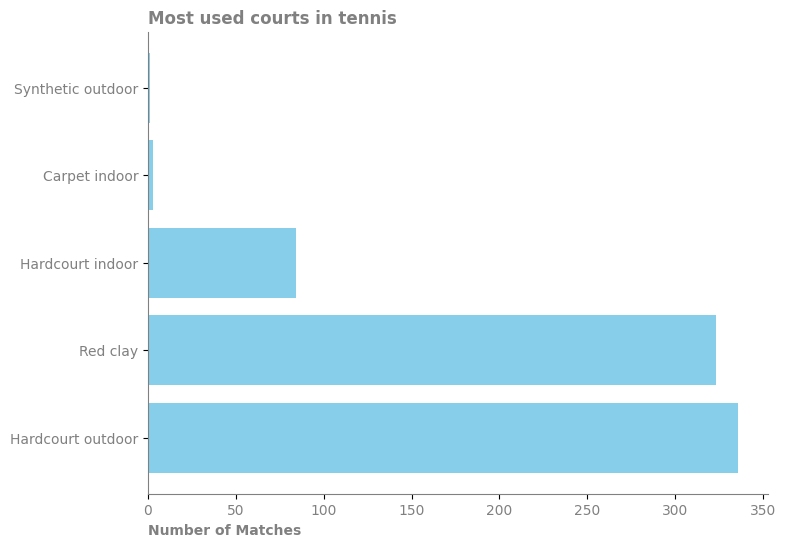

In [44]:
plt.figure(figsize=(8, 6))

plt.barh(surfaces.index, surfaces.values, color='skyblue')

plt.title('Most used courts in tennis', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xlabel('Number of Matches', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

- **Our analysis**

As you can see, we have 5 types of courts, but most of the matches are played on "Hardcourt outdoor".

---
### <font color='#D2B4DE'> Q15. How many distinct countries are represented in the dataset?</font>

- **Load needed data**

In [45]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')
venue_df = load_data(folder_path, 'venue_*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [46]:
player_by_countries = pd.concat([match_home_team_df, match_away_team_df], ignore_index=True)
pbs = player_by_countries['country'].value_counts()
pbs

country
France        85
Italy         59
USA           55
Argentina     44
Germany       40
              ..
Luxembourg     1
Venezuela      1
Bolivia        1
Algeria        1
Greece         1
Name: count, Length: 70, dtype: int64

- **Chart**

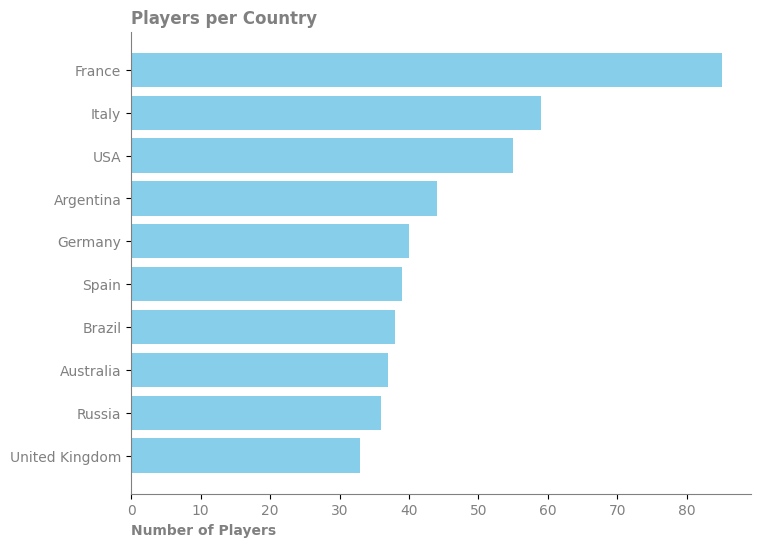

In [47]:
plt.figure(figsize=(8, 6))

pbs = pbs.head(10).sort_values(ascending=True)

plt.barh(pbs.index, pbs.values, color='skyblue')

plt.title('Players per Country', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xlabel('Number of Players', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

In [48]:
print(f'{venue_df['country'].nunique()} countries are hosted matches!')
host_countries = venue_df['country'].value_counts()
host_countries

19 countries are hosted matches!


country
France        79
Tunisia       79
Argentina     75
Egypt         68
Spain         64
China         60
Australia     57
Austria       49
Portugal      45
Croatia       38
Bulgaria      36
Italy         34
USA           25
Japan         18
Brazil        15
Qatar          8
Kazakhstan     7
Colombia       3
Serbia         2
Name: count, dtype: int64

- **Chart**

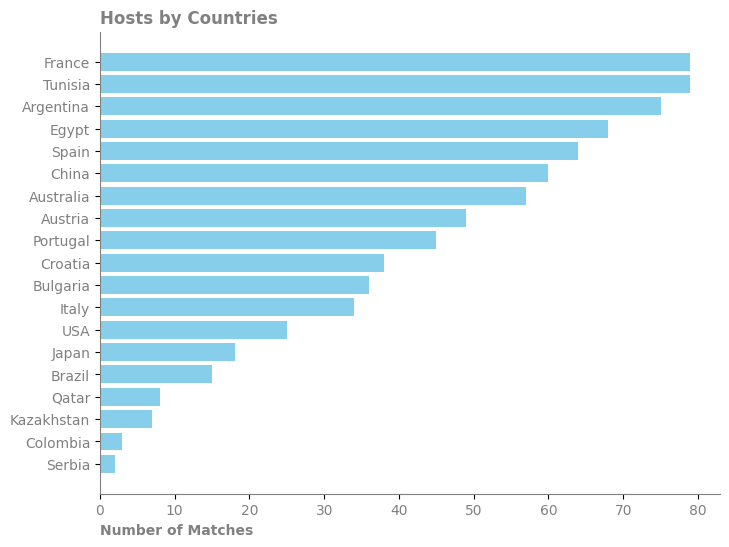

In [49]:
plt.figure(figsize=(8, 6))

host_countries = host_countries.sort_values(ascending=True)

plt.barh(host_countries.index, host_countries.values, color='skyblue')

plt.title('Hosts by Countries', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xlabel('Number of Matches', color='gray', loc='left', fontdict={'weight': 'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().tick_params(axis='y', labelsize=10)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

- **Our analysis**

We have players from 70 countries. Most of them are french. Also, 19 countries have hosted the matches.
France and Tunisia jointly hosted the most matches with 79 matches!

---
### <font color='#D2B4DE'> Q16. Which player has the highest winning percentage against top 10 ranked opponents?</font>

- **Load needed data**

In [50]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')
event_df = load_data(folder_path, 'event_*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [51]:
home_away_merge = pd.merge(match_home_team_df, match_away_team_df, on='match_id')
home_away_merge.drop_duplicates(subset='match_id')

home_away_merge = home_away_merge[(home_away_merge['current_rank_x'] <= 10) | (home_away_merge['current_rank_y'] <= 10)]

home_away_merge = home_away_merge.merge(event_df, on='match_id', how='left')

top_wins = home_away_merge[(home_away_merge['winner_code'] == 1) | (
    home_away_merge['winner_code'] == 2)]
top_wins.drop_duplicates(subset = 'match_id')

,match_id,name_x,slug_x,gender_x,user_count_x,residence_x,birthplace_x,height_x,weight_x,plays_x,...,full_name_y,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11674074,Kudermetova V.,kudermetova-veronika,F,5894,"Moscow,Russia","Kazan,Russia",1.75,None,right-handed,...,"Pegula, Jessica",1,8,2,JWrstOB,1,3,1696129200,kudermetova-pegula,False
1,11675440,Humbert U.,humbert-ugo,M,6701,Luxembourg,"Metz, France",1.88,72,left-handed,...,"Medvedev, Daniil",2,None,2,evpbsNhzb,2,3,1696221000,humbert-medvedev,False
2,11675443,Zverev A.,zverev-alexander,M,49973,"Monte Carlo, Monaco","Hamburg, Germany",1.98,90,right-handed,...,"Jarry, Nicolas",1,8,None,nTxsHRK,1,3,1696230000,jarry-zverev,False
3,11675444,Alcaraz C.,alcaraz-carlos,M,120920,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68,right-handed,...,"Musetti, Lorenzo",1,1,None,pvecsytkc,1,3,1696147200,alcaraz-musetti,False
4,11675445,Dimitrov G.,dimitrov-grigor,M,22646,"Monte Carlo, Monaco","Haskovo, Bulgaria",1.91,81,right-handed,...,"Sinner, Jannik",1,None,6,GwjsvGHb,2,3,1696251600,sinner-dimitrov,False
5,11675446,Rune H.,rune-holger,M,32906,"Charlottenlund, Denmark","Gentofte, Denmark",1.88,68,right-handed,...,"Dimitrov, Grigor",1,3,None,Gwjsvlnc,2,3,1696159800,rune-dimitrov,False
6,11675447,Alcaraz C.,alcaraz-carlos,M,120920,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68,right-handed,...,"Ruud, Casper",1,1,7,YJXsytkc,1,3,1696245900,alcaraz-ruud,False
7,11675449,Zverev A.,zverev-alexander,M,49973,"Monte Carlo, Monaco","Hamburg, Germany",1.98,90,right-handed,...,"Davidovich Fokina, Alejandro",2,8,None,nTxsgZmb,1,3,1696089300,davidovich-fokina-zverev,False
8,11675450,Nishioka Y.,nishioka-yoshihito,M,4166,"Mie, Japan","Mie, Japan",1.70,64,left-handed,...,"Sinner, Jannik",2,None,6,GKysvGHb,2,3,1696152900,sinner-nishioka,False
9,11697107,Sabalenka A.,sabalenka-aryna,F,26040,Belarus,"Minsk, Belarus",1.82,None,right-handed,...,"Kenin, Sofia",1,1,WC,kOLsefnb,1,3,1696142100,sabalenka-kenin,False


- **Our analysis**

16 players have won against the top 10 players!

---
### <font color='#D2B4DE'> Q17. What is the average number of breaks of serve per match?</font>

- **Load needed data**

In [52]:
folder_path = 'data/raw_tennis_power_parquet/'

power_df = load_data(folder_path, 'power_*.parquet')

In [53]:
break_counts = power_df.groupby('match_id')['break_occurred'].sum().reset_index()

avg_breaks = break_counts['break_occurred'].mean()
avg_breaks

7.157303370786517

- **Our analysis**

On average, about 7 breaks of serve occur in each match!

---
# <font color='#F39C12'> Additional analyses: </font>

---
### <font color='#F39C12'> 1. What is the average height of players?  </font>

- **Load needed data**

In [54]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [55]:
data_1 =pd.concat([match_away_team_df, match_home_team_df]).drop_duplicates('player_id')
average_height = data_1['height'].mean()
print("Average height of players:", average_height)

Average height of players: 1.8293215339233038


- **Our analysis**

Average height of players is 1.82 which represt that the tennis playres are tall!

---
### <font color='#F39C12'> 2. How many matches were played in each city?  </font>

- **Load needed data**

In [56]:
folder_path = 'data/raw_match_parquet/'

venue_df = load_data(folder_path, 'venue_*.parquet')

In [57]:
matches_per_city = venue_df['city'].value_counts()
matches_per_city

city
Monastir                    79
Mendoza                     69
Sharm El Sheikh             68
Cairns                      57
Bad Waltersdorf             49
Lisbon                      43
Sibenik                     38
Pazardzhik                  36
Beijing                     36
Santa Margherita Di Pula    34
Reims                       33
Shanghai                    24
Zaragoza                    24
Saint Eloi                  22
Alicante                    21
Baza                        18
Mouilleron-Le-Captif        18
Makinohara                  16
Campinas                    15
Tiburon                     13
Doha                         8
Astana                       7
Lujan                        6
Bogota                       3
Templeton                    3
Albuquerque                  3
Hilton Head                  3
Forbach                      3
Orleans                      3
Charleston                   3
Santarem                     1
Kursumlijska Banja           1
Bra

- **Chart**

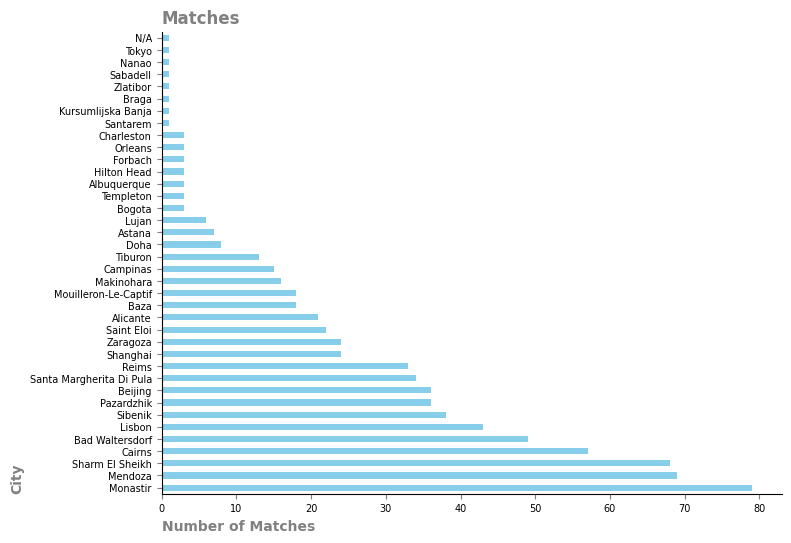

In [58]:
plt.figure(figsize=(8, 6))

matches_per_city = venue_df['city'].value_counts()
matches_per_city.plot(kind='barh', color='skyblue')
plt.title('Matches',color = 'gray',loc="left",fontdict={"weight":"bold"})
plt.xlabel('Number of Matches',color = 'gray',loc = "left",fontdict={"weight":"bold"})
plt.ylabel('City',color = 'gray',loc="bottom",fontdict={"weight":"bold"})
plt.gca().tick_params(axis='y', labelsize=7,color = "gray")
plt.gca().tick_params(axis='x', labelsize=7,color = "gray")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

- **Our analysis**

Monastir city in Tunisia with 79 and Mendoza in Argentina with 69 matches, have tho most host of competitions!

---
### <font color='#F39C12'>  3. What are the top 5 players with the highest current rank? </font>

- **Load needed data**

In [59]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [60]:
home_away_2= pd.concat([match_away_team_df,match_home_team_df]).drop_duplicates('player_id')
top_players = home_away_2[['name', 'current_rank']].sort_values('current_rank').head(5)
print(top_players)


            name current_rank
48    Świątek I.            1
35  Sabalenka A.            2
20    Alcaraz C.            2
45      Gauff C.            3
18   Medvedev D.            3


- **Our analysis**

Świątek is the best player by ranking!

---
### <font color='#F39C12'> 4. which player is most bet on? </font>

- **Load needed data**

In [61]:
folder_path = 'data/raw_odds_parquet'

odds_df = load_data(folder_path, 'odds_*.parquet')

folder_path = 'data/raw_match_parquet'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [62]:
teams = pd.merge(match_home_team_df, match_away_team_df, on = 'match_id')
odds_teams = odds_df.merge(teams, on = 'match_id', how = 'left')

odds_teams['winnig'].fillna(0, inplace = True)
odds_teams['winnig'].astype(int)
odds_teams.groupby('name_x', as_index = False)['winnig'].sum().max()

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\1360528062.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  odds_teams['winnig'].fillna(0, inplace = True)


name_x    Đaković M.
winnig             6
dtype: object

In [63]:
odds_teams.groupby('name_y', as_index=False)['winnig'].sum().max()

name_y    Świątek I.
winnig             6
dtype: object

- **Our analysis**

The most bet on player from home team is been bet on the same amount of time as player from away team which is 6!

---
### <font color='#F39C12'>5. Comparing average height and weight in female and male components.</font>

- **Load needed data**

In [64]:
teams.groupby('gender_x')['height_x'].mean()

gender_x
F    1.759394
M    1.850458
Name: height_x, dtype: float64

In [65]:
teams.groupby('gender_x')['weight_x'].mean()

gender_x
F    64.769231
M    77.578313
Name: weight_x, dtype: object

- **Our analysis**

Male tennis players are on average 10 cm taller than female tennis players. Also, they weigh 13 kg more than women.

---
### <font color='#F39C12'> 6. Which tournament has the most participants?</font>

- **Load needed data**

In [66]:
folder_path = 'data/raw_match_parquet/'

match_away_team_df = load_data(folder_path, 'away_team_11*.parquet')
match_home_team_df = load_data(folder_path, 'home_team_11*.parquet')

folder_path = 'data/raw_match_parquet/'

tournament_df = load_data(folder_path, 'tournament_*.parquet')

C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
C:\Users\AmirMohammad\AppData\Local\Temp\ipykernel_5304\838114465.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)


In [67]:
home_away_players = pd.concat([match_away_team_df,match_home_team_df]).drop_duplicates('player_id')
merge_tour_players = home_away_players.merge(tournament_df, on='match_id')

players_per_tournament = merge_tour_players.groupby('tournament_id')['player_id'].nunique()
tournament_most_players_id = players_per_tournament.idxmax()
tournament_most_players_numbers = players_per_tournament.max()
tournament_name_most_players = tournament_df.loc[tournament_df['tournament_id'] == tournament_most_players_id, 'tournament_name'].iloc[0]

print(f'Tournament {tournament_name_most_players} with {tournament_most_players_numbers} tennis players, has the most participants.')

Tournament Shanghai, China, Qualifying with 48 tennis players, has the most participants.


- **Our analysis**

Tournament Shanghai in China, with 48 tennis players, has the most participants!


---
### <font color='#F39C12'> 7. What type of ground is each tournament held on? </font>

- **Load needed data**

In [68]:
folder_path = 'data/raw_match_parquet/'

tournament_df = load_data(folder_path, 'tournament_*.parquet')

In [69]:
ground_type_per_tournament = tournament_df.groupby(['tournament_name', 'ground_type']).size().reset_index(name='count')
ground_type_per_tournament

,tournament_name,ground_type,count
0,"Albuquerque, NM, Singles Main, M-ITF-USA-35A",Hardcourt outdoor,4
1,"Alicante, Spain",Hardcourt outdoor,2
2,"Alicante, Spain, Qualifying",Hardcourt outdoor,19
3,"Astana, Kazakhstan",Hardcourt indoor,7
4,"Bad Waltersdorf, Singles Qualifying, M-ITF-AUT...",Red clay,24
5,"Bad Waltersdorf, Singles Qualifying, W-ITF-AUT...",Red clay,25
6,"Baza, Singles Qualifying, W-ITF-ESP-35A",Hardcourt outdoor,18
7,"Beijing, China",Hardcourt outdoor,36
8,"Bogota, Colombia",Red clay,3
9,"Braga, Portugal",Red clay,1


- **Our analysis**

The interesting point of this analysis was that it was determined that the number of tournaments held on Red clay and Hardcourt outdoor is equal (both 23 tournaments), but the number of matches held on them is different (336 vs 323 based on past analysis), which shows that the toutnaments held on Hardcourt outdoor takes more time to finish tournament due to holding more matches!

---
# <font color='#21618C'> Thanks for everythigs! </font>
## <font color='#21618C'> Analyzed with </font> <font color='red'> love! </font>
### <font color='#21618C'> Members of Group One! </font>